<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [156]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

#### Load the csv file

In [12]:
# type your code here
df=pd.read_csv('Heart_disease.csv')
df.head()

<IPython.core.display.Javascript object>

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
df.shape

(4240, 16)

### Let's begin with some hands-on practice exercises

In [159]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [160]:
df1=df.dropna()

In [161]:
df1.shape

(3658, 16)

In [162]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

<AxesSubplot:>

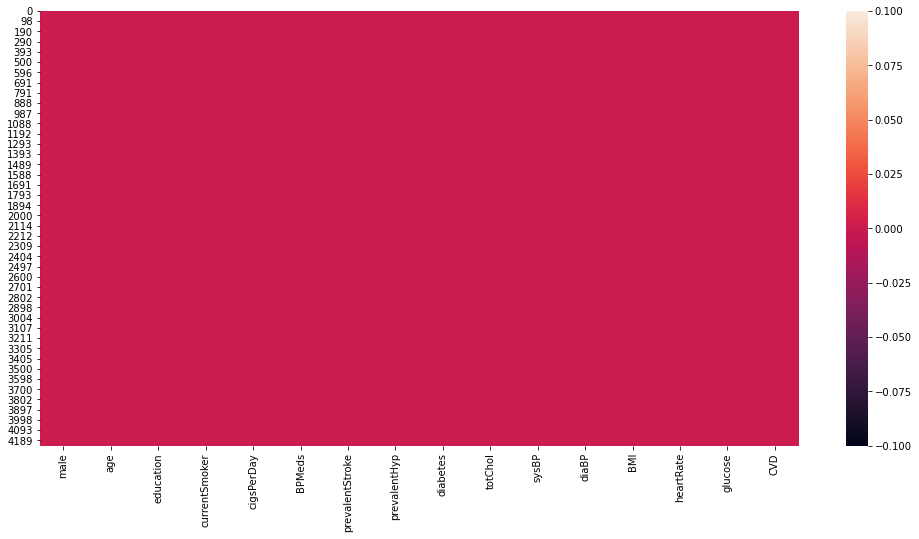

In [163]:
plt.figure(figsize=(17,8))
sns.heatmap(df1.isnull())

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [164]:
# type your code here
df1['CVD'].value_counts(normalize=True)*100


0    84.7731
1    15.2269
Name: CVD, dtype: float64

C:\Users\gargv\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CVD', ylabel='count'>

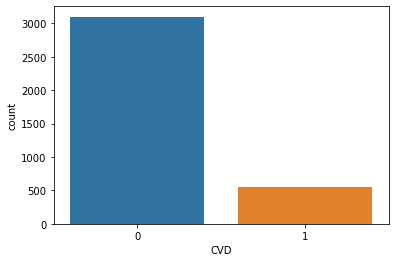

In [165]:
sns.countplot(df1['CVD'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [166]:
# type your code here
import statsmodels.api as sm
X=df1[['diaBP','sysBP', 'BPMeds']]
X=sm.add_constant(X)
y=df1['CVD']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2926, 4) (2926,)
(732, 4) (732,)


In [168]:
model=sm.Logit(y_train,X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.396871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2922
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                 0.04918
Time:                        20:16:31   Log-Likelihood:                -1161.2
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 7.281e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6423      0.371    -12.529      0.000      -5.369      -3.916
diaBP         -0.0052      0.

In [169]:
predict=model.predict(X_test)


In [170]:
y_pred=[0 if i<0.5 else 1 for i in predict ]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [171]:
# type your code here

df1['male']=df1['male'].astype(object)
df1['education']=df1['education'].astype(object)
df1['currentSmoker']=df1['currentSmoker'].astype(object)
df1['BPMeds']=df1['BPMeds'].astype(object)
df1['prevalentStroke']=df1['prevalentStroke'].astype(object)
df1['prevalentHyp']=df1['prevalentHyp'].astype(object)
df1['diabetes']=df1['diabetes'].astype(object)

<ipython-input-171-af993c3fd4d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['male']=df1['male'].astype(object)
<ipython-input-171-af993c3fd4d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['education']=df1['education'].astype(object)
<ipython-input-171-af993c3fd4d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [172]:

X=df1.select_dtypes(include='object')
x=pd.get_dummies(X,drop_first=True)
X=sm.add_constant(x)
y=df1['CVD']


In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2926, 10) (2926,)
(732, 10) (732,)


In [174]:
model=sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.392075
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2916
Method:                           MLE   Df Model:                            9
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                 0.06067
Time:                        20:16:31   Log-Likelihood:                -1147.2
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 2.099e-27
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1642      0.119    -18.132      0.000      -2.398      -1.930
male_1                0.5230      0.112      4.662      0.000       0.303       0.743
education_2.0        -0.5367      0.134     -4.008      0.000      -0.799      -0.274
education_3.0        -0.4741      0.164     -2.889      0.004      -0.796      -0.152
education_4.0        -0.2968      0.174     -1.709      0.087      -0.637       0.044
currentSmoker_1       0.0344      0.112      0.307      0.759      -0.185       0.254
BPMeds_1.0            0.6933      0.238      2.916      0.004       0.227       1.159
prevalentStroke_1     0.6703      0.510      1.315      0.189      -0.329       1.670
prevalentHyp_1        0.8270      0.114      7.285      0.000       0.605       1.050
diabetes_1            0.8346      0.257      3.247      0.001       0.331       1.338
=====================================================================================
"""

In [175]:
df1_odds=pd.DataFrame(np.exp(model.params),columns = ['Odds'])
df1_odds

,Odds
const,0.114844
male_1,1.687104
education_2.0,0.584690
education_3.0,0.622438
education_4.0,0.743165
currentSmoker_1,1.035042
BPMeds_1.0,2.000332
prevalentStroke_1,1.954872
prevalentHyp_1,2.286532
diabetes_1,2.303822


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [176]:
# type your code here
X=pd.get_dummies(df1['prevalentHyp'],drop_first=True)
y=df1.CVD
X=sm.add_constant(X)

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2926, 2) (2926,)
(732, 2) (732,)


In [178]:
model=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.403699
         Iterations 6


In [179]:
df1_odds=pd.DataFrame(np.exp(model.params),columns=['Odds'])
odds_hyp=df1_odds.iloc[1,0]
odds_no_hyp=(1/df1_odds.iloc[1,0])

print(df1_odds)
print('Odds of having heart disease given he has a history',odds_hyp)
print('Odds of having heart disease given he does not have a history',odds_no_hyp)
print('Odds ratio ',odds_hyp/odds_no_hyp)


           Odds
const  0.119114
1      2.612156
Odds of having heart disease given he has a history 2.612156295224312
Odds of having heart disease given he does not have a history 0.38282548476454303
Odds ratio  6.823360510680002


<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [180]:
# type your code here
numeric=df1.select_dtypes(include=np.number).drop(['CVD'],axis=1)
cat=df1.select_dtypes(include='object')
cat1=pd.get_dummies(cat,drop_first=True)
X=pd.concat([numeric,cat1],axis=1)
X=sm.add_constant(X)
y=df1.CVD

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2926, 18) (2926,)
(732, 18) (732,)


In [182]:
model5=sm.Logit(y_train,X_train).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.372817
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2908
Method:                           MLE   Df Model:                           17
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.1068
Time:                        20:16:31   Log-Likelihood:                -1090.9
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 1.242e-45
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.2491      0.795    -10.377      0.000      -9.807      -6.691
age                   0.0590      0.008      7.735      0.000       0.044       0.074
cigsPerDay            0.0086      0.007      1.174      0.241      -0.006       0.023
totChol               0.0014      0.001      1.067      0.286      -0.001       0.004
sysBP                 0.0124      0.004      2.904      0.004       0.004       0.021
diaBP                -0.0009      0.007     -0.125      0.901      -0.015       0.013
BMI                   0.0206      0.014      1.464      0.143      -0.007       0.048
heartRate             0.0010      0.005      0.208      0.835      -0.008       0.010
glucose               0.0058      0.003      2.230      0.026       0.001       0.011
male_1                0.5808      0.124      4.693      0.000       0.338       0.823
education_2.0        -0.2545      0.141     -1.809      0.070      -0.530       0.021
education_3.0        -0.2815      0.170     -1.653      0.098      -0.615       0.052
education_4.0        -0.0078      0.180     -0.043      0.966      -0.361       0.345
currentSmoker_1       0.1291      0.179      0.723      0.470      -0.221       0.479
BPMeds_1.0            0.4419      0.249      1.776      0.076      -0.046       0.930
prevalentStroke_1     0.6032      0.516      1.169      0.242      -0.408       1.615
prevalentHyp_1        0.1676      0.156      1.072      0.284      -0.139       0.474
diabetes_1            0.1162      0.353      0.329      0.742      -0.577       0.809
=====================================================================================
"""

In [183]:
y_pred1=model5.predict(X_test)
y_pred=[0 if i<0.5 else 1 for i in y_pred1]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [184]:
# type your code her
model.pvalues[model.pvalues<0.05].index

Index(['const', 1], dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [185]:
# type your code here
pd.DataFrame(model.params,columns=['Odds'])

,Odds
const,-2.127678
1,0.960176


<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [186]:
# type your code here
pd.DataFrame(model.params,columns=['Odds'])

,Odds
const,-2.127678
1,0.960176


In [187]:
# type your code here
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix
ac= accuracy_score

In [188]:
y_pred=model5.predict(X_test)
y_pred=[0 if i<0.5 else 1 for i in y_pred]

In [189]:
cm1=confusion_matrix(y_test,y_pred)
q1=pd.DataFrame(cm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
q1

,Predicted:0,Predicted:1
Actual:0,604,1
Actual:1,116,11


In [190]:
accuracy_score(y_test,y_pred)

0.8401639344262295

In [191]:
from sklearn.metrics import classification_report

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       605
           1       0.92      0.09      0.16       127

    accuracy                           0.84       732
   macro avg       0.88      0.54      0.53       732
weighted avg       0.85      0.84      0.78       732



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [193]:
# type your code here
numeric=df1.select_dtypes(include=np.number).drop(['CVD'],axis=1)
cat=df1.select_dtypes(include='object')
cat1=pd.get_dummies(cat,drop_first=True)
X=pd.concat([numeric,cat1],axis=1)
X=sm.add_constant(X)
y=df1.CVD

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model=sm.Logit(y_train,X_train).fit()
model.summary()

(2926, 18) (2926,)
(732, 18) (732,)
Optimization terminated successfully.
         Current function value: 0.372817
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2908
Method:                           MLE   Df Model:                           17
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.1068
Time:                        20:16:31   Log-Likelihood:                -1090.9
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 1.242e-45
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.2491      0.795    -10.377      0.000      -9.807      -6.691
age                   0.0590      0.008      7.735      0.000       0.044       0.074
cigsPerDay            0.0086      0.007      1.174      0.241      -0.006       0.023
totChol               0.0014      0.001      1.067      0.286      -0.001       0.004
sysBP                 0.0124      0.004      2.904      0.004       0.004       0.021
diaBP                -0.0009      0.007     -0.125      0.901      -0.015       0.013
BMI                   0.0206      0.014      1.464      0.143      -0.007       0.048
heartRate             0.0010      0.005      0.208      0.835      -0.008       0.010
glucose               0.0058      0.003      2.230      0.026       0.001       0.011
male_1                0.5808      0.124      4.693      0.000       0.338       0.823
education_2.0        -0.2545      0.141     -1.809      0.070      -0.530       0.021
education_3.0        -0.2815      0.170     -1.653      0.098      -0.615       0.052
education_4.0        -0.0078      0.180     -0.043      0.966      -0.361       0.345
currentSmoker_1       0.1291      0.179      0.723      0.470      -0.221       0.479
BPMeds_1.0            0.4419      0.249      1.776      0.076      -0.046       0.930
prevalentStroke_1     0.6032      0.516      1.169      0.242      -0.408       1.615
prevalentHyp_1        0.1676      0.156      1.072      0.284      -0.139       0.474
diabetes_1            0.1162      0.353      0.329      0.742      -0.577       0.809
=====================================================================================
"""

In [194]:
y_prob=model.predict(X_test)
y_pred=[0 if i<0.18 else 1 for i in y_prob]

In [195]:
# type your code here
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_pred)

0.2636315922477306

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [196]:
# type your code here
df1.corr()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
age,1.000000,-0.189295,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
cigsPerDay,-0.189295,1.000000,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
totChol,0.268252,-0.030400,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338
sysBP,0.388267,-0.094781,0.219925,1.000000,0.786669,0.330917,0.184797,0.134651,0.222821
diaBP,0.208283,-0.056746,0.174422,0.786669,1.000000,0.385348,0.178744,0.063540,0.150124
BMI,0.137511,-0.087395,0.121056,0.330917,0.385348,1.000000,0.074131,0.083683,0.082055
heartRate,-0.002722,0.064030,0.093053,0.184797,0.178744,0.074131,1.000000,0.097074,0.020514
glucose,0.118349,-0.053726,0.049884,0.134651,0.063540,0.083683,0.097074,1.000000,0.121990
CVD,0.233983,0.052014,0.091338,0.222821,0.150124,0.082055,0.020514,0.121990,1.000000


<AxesSubplot:>

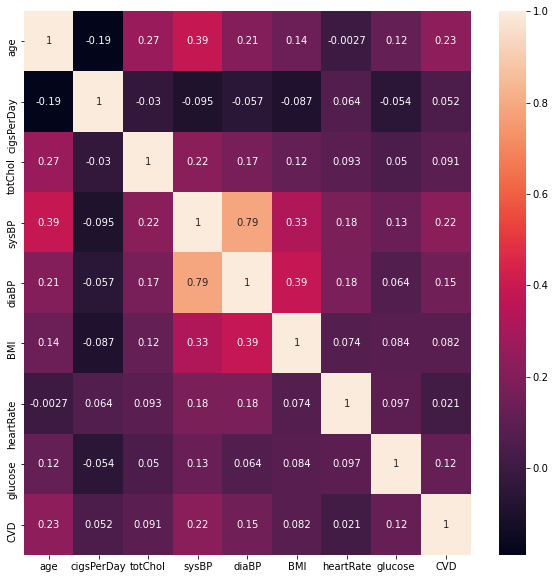

In [197]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()

df_num = df1.select_dtypes(include = [np.number]).drop("CVD" , axis = 1)

VIF["sign"] = df_num.columns

VIF["vif"] = [variance_inflation_factor(df_num.values , i) for i in range(df_num.shape[1])]
VIF

,sign,vif
0,age,39.537894
1,cigsPerDay,1.606417
2,totChol,31.117984
3,sysBP,112.210023
4,diaBP,128.887196
5,BMI,44.191190
6,heartRate,35.341436
7,glucose,12.790453


We can remove sysBP, diaBP, age, BBMI, heart Rate

In [199]:
# type your code here
numeric=df1.select_dtypes(include=np.number).drop(['CVD','diaBP'],axis=1)
cat=df1.select_dtypes(include='object')
cat1=pd.get_dummies(cat,drop_first=True)
X=pd.concat([numeric,cat1],axis=1)
X=sm.add_constant(X)
y=df1.CVD

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2926, 17) (2926,)
(732, 17) (732,)


In [200]:
model=sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.372819
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2909
Method:                           MLE   Df Model:                           16
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.1068
Time:                        20:16:33   Log-Likelihood:                -1090.9
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 3.038e-46
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.2770      0.763    -10.850      0.000      -9.772      -6.782
age                   0.0592      0.007      7.934      0.000       0.045       0.074
cigsPerDay            0.0086      0.007      1.171      0.241      -0.006       0.023
totChol               0.0014      0.001      1.066      0.286      -0.001       0.004
sysBP                 0.0120      0.003      3.651      0.000       0.006       0.019
BMI                   0.0203      0.014      1.469      0.142      -0.007       0.047
heartRate             0.0010      0.005      0.205      0.838      -0.008       0.010
glucose               0.0058      0.003      2.233      0.026       0.001       0.011
male_1                0.5788      0.123      4.714      0.000       0.338       0.820
education_2.0        -0.2549      0.141     -1.813      0.070      -0.530       0.021
education_3.0        -0.2825      0.170     -1.661      0.097      -0.616       0.051
education_4.0        -0.0091      0.180     -0.051      0.959      -0.362       0.343
currentSmoker_1       0.1298      0.178      0.728      0.467      -0.220       0.480
BPMeds_1.0            0.4431      0.249      1.783      0.075      -0.044       0.930
prevalentStroke_1     0.6017      0.516      1.166      0.243      -0.409       1.613
prevalentHyp_1        0.1648      0.155      1.066      0.287      -0.138       0.468
diabetes_1            0.1176      0.353      0.333      0.739      -0.575       0.810
=====================================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [228]:
# type your code here
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
RFE_model=RFE(estimator=lr,n_features_to_select=5)
model1=RFE_model.fit(X_train,y_train)


C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [202]:
model1.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True,  True])

In [229]:
df2=pd.DataFrame(model1.support_,index=X.columns)
df2

,0
const,False
age,False
cigsPerDay,False
totChol,False
sysBP,False
diaBP,False
BMI,False
heartRate,False
glucose,False
male_1,True


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [204]:
X=X[['male_1','BPMeds_1.0','prevalentStroke_1','prevalentHyp_1','diabetes_1']]
X=sm.add_constant(X)
y=df1.CVD

from sklearn.model_selection import train_test_split
X_train12, X_test12, y_train12, y_test12= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train12.shape, y_train12.shape)
print(X_test12.shape, y_test12.shape)

(2926, 6) (2926,)
(732, 6) (732,)


In [205]:
model12=sm.Logit(y_train12,X_train12).fit()

print(model12.summary())
pred=model12.predict(X_test12)
y_pred12=[0 if x<0.5 else 1 for x in pred]

Optimization terminated successfully.
         Current function value: 0.395494
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2920
Method:                           MLE   Df Model:                            5
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                 0.05248
Time:                        20:16:34   Log-Likelihood:                -1157.2
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 5.803e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4291      0.094    -25.762      0.000      -2.614      -2.244
male_1  

In [206]:
from sklearn.metrics import f1_score
print('Accuracy', accuracy_score(y_test12,y_pred12))
print('F1 Score', f1_score(y_test12,y_pred12))

Accuracy 0.8265027322404371
F1 Score 0.0


In [207]:
print(classification_report(y_test12,y_pred12))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       605
           1       0.00      0.00      0.00       127

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732



C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

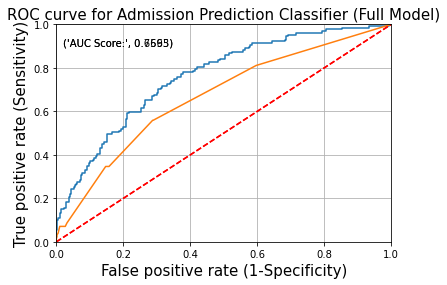

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score
# type your code here
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred1),4)))


fpr1, tpr1, thresholds1 = roc_curve(y_test12, pred)

# plot the ROC curve
plt.plot(fpr1, tpr1)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test12, pred),4)))

                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [210]:
# type your code here
X14=df1['heartRate']
X14=sm.add_constant(X14)
y14=df1.CVD
X_train14,X_test14, y_train14, y_test14=train_test_split(X14,y14,random_state=10, test_size=0.2)

print(X_train14.shape, y_train14.shape)
print(X_test14.shape, y_test14.shape)

(2926, 2) (2926,)
(732, 2) (732,)


In [211]:
model14=sm.Logit(y_train14,X_train14).fit()
print(model14.summary())

Optimization terminated successfully.
         Current function value: 0.417035
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2924
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:               0.0008669
Time:                        20:18:06   Log-Likelihood:                -1220.2
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                    0.1456
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2303      0.328     -6.802      0.000      -2.873      -1.588
heartRate      0.0062      0.

In [212]:
pred14=model14.predict(X_test14)
pred=[0 if x<0.5 else 1 for x in pred14]

In [213]:
roc_auc_score(y_test14, pred14)

0.4910978069890024

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [214]:
# type your code here
from sklearn.metrics import log_loss
print('Log Loss',log_loss(y_test14,pred14))

Log Loss 0.46459286633732927


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [215]:
# type your code here
d_heart=-2*model14.llf

d_5=-2*model5.llf

print(d_heart)
print(d_5)

2440.4867720403295
2181.722253115115


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [216]:
# type your code here
from sklearn.metrics import log_loss
print('Log Loss',log_loss(y_test,y_pred))

Log Loss 9.76728558762361


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [217]:
# type your code here
X=df1['currentSmoker'].astype(dtype=np.number)
X=sm.add_constant(X)
y=df1.CVD

In [218]:
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=10, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2926, 2) (2926,)
(732, 2) (732,)


In [219]:
model18=sm.Logit(y_train,X_train).fit()
print(model18.summary())

Optimization terminated successfully.
         Current function value: 0.417384
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2924
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:               2.934e-05
Time:                        20:18:06   Log-Likelihood:                -1221.3
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                    0.7889
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.7451      0.073    -24.045      0.000      -1.887      -1.603
currentSmoker    -0.

In [220]:
pred=model18.predict(X_test)
pred=[0 if x<0.5 else 1 for x in pred]

In [221]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       605
           1       0.00      0.00      0.00       127

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732



C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gargv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [222]:
# type your code here
# type your code here
numeric=df1.select_dtypes(include=np.number).drop(['CVD'],axis=1)
cat=df1.select_dtypes(include='object')
cat1=pd.get_dummies(cat,drop_first=True)
X=pd.concat([numeric,cat1],axis=1)
X=sm.add_constant(X)
y=df1.CVD

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10,test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model5=sm.Logit(y_train,X_train).fit()
model5.summary()

y_pred1=model5.predict(X_test)
y_pred=[0 if i<0.5 else 1 for i in y_pred1]

(2926, 18) (2926,)
(732, 18) (732,)
Optimization terminated successfully.
         Current function value: 0.372817
         Iterations 7


In [223]:
pd.DataFrame(y_test).value_counts(normalize=True)

CVD
0      0.826503
1      0.173497
dtype: float64

In [224]:
model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2908
Method:                           MLE   Df Model:                           17
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.1068
Time:                        20:18:06   Log-Likelihood:                -1090.9
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 1.242e-45
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.2491      0.795    -10.377      0.000      -9.807      -6.691
age                   0.0590      0.008      7.735      0.000       0.044       0.074
cigsPerDay            0.0086      0.007      1.174      0.241      -0.006       0.023
totChol               0.0014      0.001      1.067      0.286      -0.001       0.004
sysBP                 0.0124      0.004      2.904      0.004       0.004       0.021
diaBP                -0.0009      0.007     -0.125      0.901      -0.015       0.013
BMI                   0.0206      0.014      1.464      0.143      -0.007       0.048
heartRate             0.0010      0.005      0.208      0.835      -0.008       0.010
glucose               0.0058      0.003      2.230      0.026       0.001       0.011
male_1                0.5808      0.124      4.693      0.000       0.338       0.823
education_2.0        -0.2545      0.141     -1.809      0.070      -0.530       0.021
education_3.0        -0.2815      0.170     -1.653      0.098      -0.615       0.052
education_4.0        -0.0078      0.180     -0.043      0.966      -0.361       0.345
currentSmoker_1       0.1291      0.179      0.723      0.470      -0.221       0.479
BPMeds_1.0            0.4419      0.249      1.776      0.076      -0.046       0.930
prevalentStroke_1     0.6032      0.516      1.169      0.242      -0.408       1.615
prevalentHyp_1        0.1676      0.156      1.072      0.284      -0.139       0.474
diabetes_1            0.1162      0.353      0.329      0.742      -0.577       0.809
=====================================================================================
"""

In [225]:
fpr , tpr , thresholds = roc_curve(y_test, y_pred1)

youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Thresholds': thresholds})

youdens_table['Difference'] = youdens_table['TPR'] - youdens_table['FPR']

youdens_table = youdens_table.sort_values('Difference' , ascending=False).reset_index(drop = True)

youdens_table.head()

,TPR,FPR,Thresholds,Difference
0,0.779528,0.376860,0.134758,0.402668
1,0.716535,0.314050,0.153150,0.402486
2,0.771654,0.373554,0.136901,0.398100
3,0.740157,0.342149,0.147086,0.398009
4,0.755906,0.358678,0.141405,0.397228


In [231]:
thresholds

array([1.90252982, 0.90252982, 0.55305502, 0.5469853 , 0.47552498,
       0.46480609, 0.45290563, 0.44415104, 0.43452669, 0.42781425,
       0.42207885, 0.40140525, 0.39771121, 0.3916056 , 0.37633706,
       0.35320259, 0.35182687, 0.34655052, 0.34607446, 0.3444171 ,
       0.34395799, 0.33007096, 0.32738561, 0.31827588, 0.31739064,
       0.31498075, 0.31448854, 0.31090023, 0.31068453, 0.30120452,
       0.30001557, 0.29308153, 0.29276449, 0.29224032, 0.28657376,
       0.28537711, 0.28515855, 0.27866864, 0.27759592, 0.27747056,
       0.27664966, 0.26670991, 0.26340979, 0.26039252, 0.25834179,
       0.25427621, 0.25424748, 0.2485328 , 0.24808681, 0.24795122,
       0.2465357 , 0.2453502 , 0.24396664, 0.23941881, 0.23909548,
       0.23607715, 0.23573255, 0.23325847, 0.22953095, 0.22869051,
       0.22676972, 0.22527646, 0.22336138, 0.21922735, 0.21900281,
       0.21788836, 0.2171712 , 0.21299284, 0.21274951, 0.20722985,
       0.20634941, 0.20516317, 0.20512841, 0.20230317, 0.20221

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [16]:
df.skew()

male                0.285997
age                 0.228867
education           0.688730
currentSmoker       0.023595
cigsPerDay          1.247052
BPMeds              5.551462
prevalentStroke    12.912160
prevalentHyp        0.818827
diabetes            5.995907
totChol             0.871881
sysBP               1.145285
diaBP               0.713250
BMI                 0.982183
heartRate           0.644372
glucose             6.214948
CVD                 1.940516
dtype: float64